# Progetto IDS
### Nicolò Calandra - Andrea Di Blasi

## Introduzione
In questo progetto andremo a creare un modello predittivo sulla formula 1.
L'obiettivo è di analizzare la correlazione tra posizione in qualifica e posizione in gara in base al tipo di circuito, che suddivideremo in 2 categorie: circuito ad alta velocità e circuito tecnico.
Con circuito tecnico intendiamo una pista ricca di curve, in cui il fattore più importante è la tecnica e bravura del pilota più che il veicolo che guida. Un circuito ad alta velocità, invece, è costituito da più rettilinei in cui la tecnica e la bravura del pilota sono meno influenti sul risultato della gara, bensì la potenza del veicolo influenza la posizione finale 


In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
circuits = pd.read_csv("circuits.csv")
races = pd.read_csv("races.csv")
results = pd.read_csv("results.csv")


In [23]:
circuits.head()

,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [24]:
circuits.isnull().sum()

circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           0
url           0
dtype: int64

In [25]:
races.head()

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [26]:
results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [27]:
results.isnull().sum()

resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

In [28]:
# we now need to create a new dataframe containing grid position, final position, circuit name and category (high-speed or technical)

df = pd.merge(results, races, on='raceId')

df = pd.merge(df, circuits, on='circuitId')

df.drop(['circuitRef', 'circuitId', 'resultId', 'raceId', 'url_y', 'driverId', 'constructorId', 'number', 'positionText', 'name_x', 'time_y','positionOrder', 'points', 'laps', 'time_x', 'milliseconds', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed', 'statusId', 'year', 'round', 'location', 'country', 'lat', 'lng', 'alt', 'url_x', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time', 'quali_date', 'quali_time', 'sprint_date', 'sprint_time'], axis=1, inplace=True)

# we need to keep only grid 1-3 to determine the percentage of the podium to win
df = df[(df['grid'] <= 3) & (df['grid'] > 0)]

# we need to clean the data of drivers that did not conclude the race
df = df.replace('\\N', 0)


df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3391 entries, 0 to 26758
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   grid      3391 non-null   int64 
 1   position  3391 non-null   object
 2   date      3391 non-null   object
 3   name_y    3391 non-null   object
dtypes: int64(1), object(3)
memory usage: 132.5+ KB


,grid,position,date,name_y
0,1,1,2008-03-16,Albert Park Grand Prix Circuit
4,3,5,2008-03-16,Albert Park Grand Prix Circuit
8,2,0,2008-03-16,Albert Park Grand Prix Circuit
22,1,1,2007-03-18,Albert Park Grand Prix Circuit
23,2,2,2007-03-18,Albert Park Grand Prix Circuit


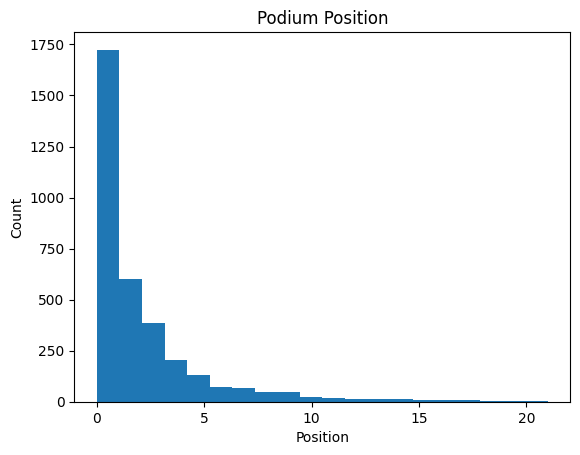

In [29]:
# we can now display the dataframe to see the results of the podium


plt.hist(df["position"].astype(int), bins=20)
plt.xlabel("Position") 
plt.ylabel("Count")
plt.title("Podium Position")

plt.show()
